
# Outlier handling using IQR and ZSCORE methods on beer_servings data **bold text**

In [2]:
import numpy as np
import pandas as pd
td=pd.read_csv('/content/beer-servings.csv')
td.head()

,Unnamed: 0,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,0,Afghanistan,0.0,0.0,0.0,0.0,Asia
1,1,Albania,89.0,132.0,54.0,4.9,Europe
2,2,Algeria,25.0,0.0,14.0,0.7,Africa
3,3,Andorra,245.0,138.0,312.0,12.4,Europe
4,4,Angola,217.0,57.0,45.0,5.9,Africa


In [3]:
td.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    193 non-null    int64  
 1   country                       193 non-null    object 
 2   beer_servings                 185 non-null    float64
 3   spirit_servings               185 non-null    float64
 4   wine_servings                 187 non-null    float64
 5   total_litres_of_pure_alcohol  192 non-null    float64
 6   continent                     193 non-null    object 
dtypes: float64(4), int64(1), object(2)
memory usage: 10.7+ KB


In [5]:
td.shape

(193, 7)

In [6]:
td.isna().sum()

Unnamed: 0                      0
country                         0
beer_servings                   8
spirit_servings                 8
wine_servings                   6
total_litres_of_pure_alcohol    1
continent                       0
dtype: int64

In [7]:
td.columns

Index(['Unnamed: 0', 'country', 'beer_servings', 'spirit_servings',
       'wine_servings', 'total_litres_of_pure_alcohol', 'continent'],
      dtype='object')

In [8]:
td1=td.drop(['Unnamed: 0'],axis=1)
td1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 185 non-null    float64
 2   spirit_servings               185 non-null    float64
 3   wine_servings                 187 non-null    float64
 4   total_litres_of_pure_alcohol  192 non-null    float64
 5   continent                     193 non-null    object 
dtypes: float64(4), object(2)
memory usage: 9.2+ KB


In [11]:
td1['continent'].unique()

array(['Asia', 'Europe', 'Africa', 'North America', 'South America',
       'Oceania'], dtype=object)

In [12]:
td1=td1.interpolate()
td1.isna().sum()

country                         0
beer_servings                   0
spirit_servings                 0
wine_servings                   0
total_litres_of_pure_alcohol    0
continent                       0
dtype: int64

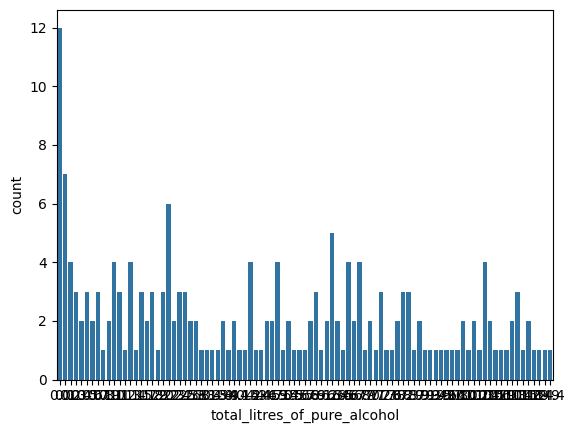

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.countplot(x='total_litres_of_pure_alcohol', data=td1 )
plt.show()

<Axes: ylabel='beer_servings'>

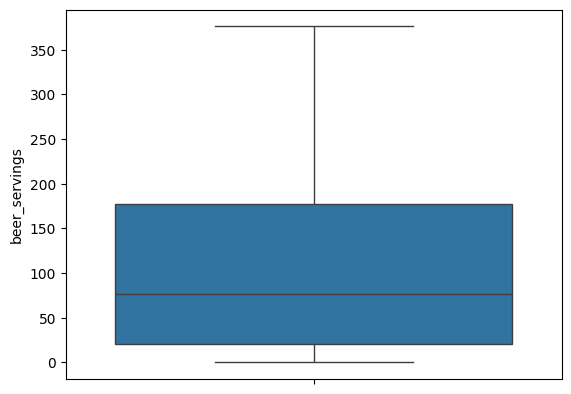

In [14]:
sns.boxplot(data=td1['beer_servings'])

<Axes: ylabel='total_litres_of_pure_alcohol'>

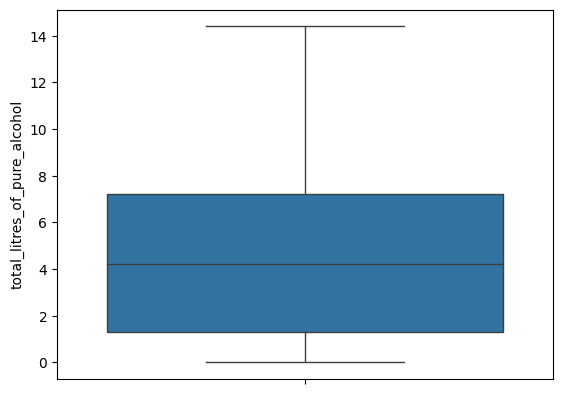

In [18]:
sns.boxplot(data=td1['total_litres_of_pure_alcohol'])

<Axes: ylabel='spirit_servings'>

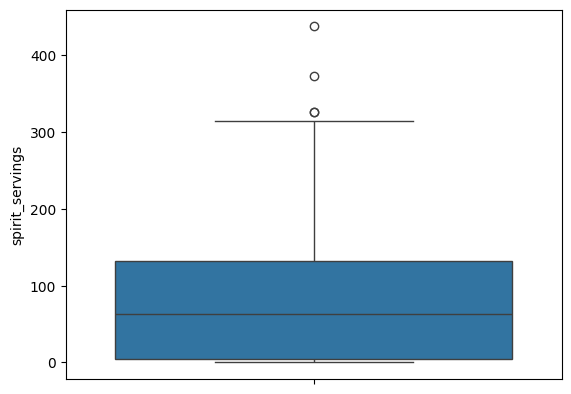

In [15]:
sns.boxplot(data=td1['spirit_servings'])

it has outliers

<Axes: ylabel='wine_servings'>

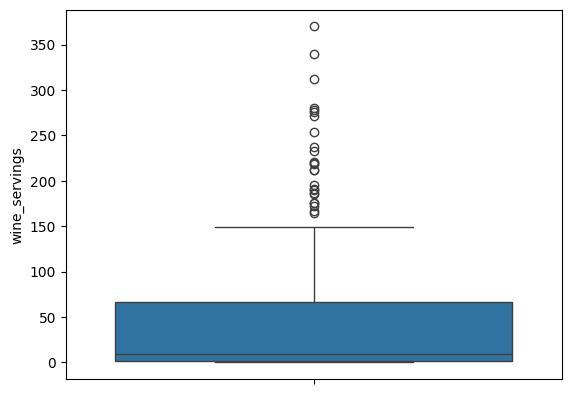

In [16]:

sns.boxplot(data=td1['wine_servings'])

REmove out liers from 'spirit_servings',
       'wine_servings'

# **IQR method**

In [20]:
q1=td1['spirit_servings'].quantile(0.25)
q3=td1['spirit_servings'].quantile(0.75)
iqr=q3-q1
iqr

127.0

In [21]:
upper_lim=q3+1.5*iqr
low_lim=q1-1.5*iqr
print(low_lim)
print(upper_lim)

-185.5
322.5


In [22]:
out=[]
for x in td1['spirit_servings']:
  if x>upper_lim or x < low_lim:
    out.append(x)
out

[373.0, 438.0, 326.0, 326.0]

In [23]:
td1['spirit_servings'] = td1['spirit_servings'].clip(lower=low_lim,upper=upper_lim)

In [24]:
out=[]
for x in td1['spirit_servings']:
  if x>upper_lim or x < low_lim:
    out.append(x)
out

[]

<Axes: ylabel='spirit_servings'>

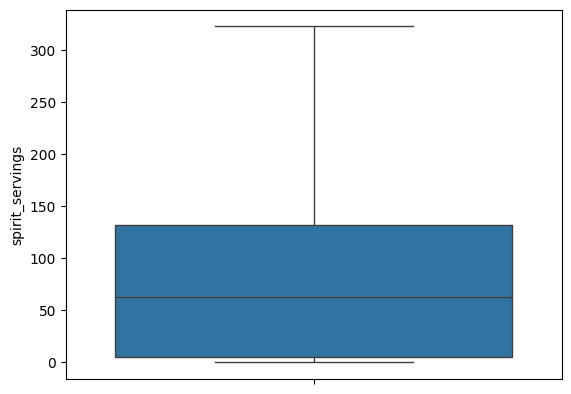

In [25]:
sns.boxplot(data=td1['spirit_servings'])

In [26]:
q1=td1['wine_servings'].quantile(0.25)
q3=td1['wine_servings'].quantile(0.75)
iqr=q3-q1
upper_lim=q3+1.5*iqr
low_lim=q1-1.5*iqr
print(low_lim)
print(upper_lim)
out=[]
for x in td1['wine_servings']:
  if x>upper_lim or x < low_lim:
    out.append(x)
out


-97.25
164.75


[312.0,
 221.0,
 212.0,
 191.0,
 212.0,
 172.0,
 254.0,
 278.0,
 233.0,
 370.0,
 175.0,
 218.0,
 185.0,
 165.0,
 237.0,
 271.0,
 190.0,
 175.0,
 339.0,
 167.0,
 276.0,
 186.0,
 280.0,
 195.0,
 220.0]

In [27]:
td1['wine_servings'] = td1['wine_servings'].clip(lower=low_lim,upper=upper_lim)
out=[]
for x in td1['wine_servings']:
  if x>upper_lim or x < low_lim:
    out.append(x)
out

[]

<Axes: ylabel='wine_servings'>

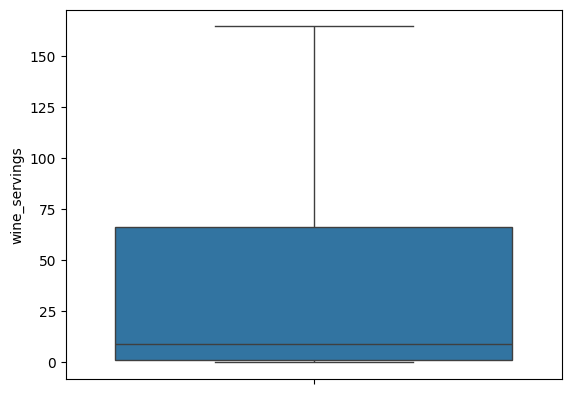

In [28]:
sns.boxplot(data=td1['wine_servings'])